## Multi Class Classification Data Science Project on Diabetes

**Table of Content**
* Part 1: EDA & Visualization
* Part 2.1: Machine Learning Model -- Logistic Regression
* Part 2.2: Machine Learning Model -- Supporting Vector Classification
* Part 2.3: Machine Learning Model -- Decision Tree
* Part 3: K Means Clustering
* Part 4: Conclusions & Recommendations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Dataset of Diabetes .csv")
df.head(2)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [4]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


**Observation**
* The average age is 53 years old. The age ranges from 20 and 79 year old.
* There 1000 unique patients.

#### Rearrange Gender Categories and convert gender from categorical to numerical

In [5]:
df["Gender"]=df.Gender.replace("f","F")
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [6]:
df["Gender"]=df.Gender.map({"F":0,"M":1})
df.Gender.unique()

array([0, 1])

#### Strip the space in the CLASS features

In [7]:
df.CLASS.unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [8]:
df["CLASS"]=df.CLASS.str.strip()
df.CLASS.unique()

array(['N', 'P', 'Y'], dtype=object)

In [9]:
d=df.duplicated().sum()
print(f"Total duplicated values are {d}.")

Total duplicated values are 0.


#### Attririon Rate

* N: Non-diabetic
* P: Pre-diabetic
* Y: Diabetic

In [10]:
df.CLASS.value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

In [11]:
df.CLASS.value_counts(normalize=True)

CLASS
Y    0.844
N    0.103
P    0.053
Name: proportion, dtype: float64

In [12]:
n=df.loc[df.CLASS=="N"].shape[0]
p=df.loc[df.CLASS=="P"].shape[0]
y=df.loc[df.CLASS=="Y"].shape[0]
n_p=np.round(n/df.shape[0]*100,2)
p_p=np.round(p/df.shape[0]*100,2)
y_p=np.round(y/df.shape[0]*100,2)
print(f"The number of people who are non-diabetic is {n}. The number of people who are pre-diabetic {p}. The number of people who are diabetic is {y}.")
print(f"The percentage of non-diabetic is {n_p}%. The percentage of pre-diabetic is {p_p}%. The percentage of people who are diabetic is {y_p}%")

The number of people who are non-diabetic is 103. The number of people who are pre-diabetic 53. The number of people who are diabetic is 844.
The percentage of non-diabetic is 10.3%. The percentage of pre-diabetic is 5.3%. The percentage of people who are diabetic is 84.4%


#### Check on null values

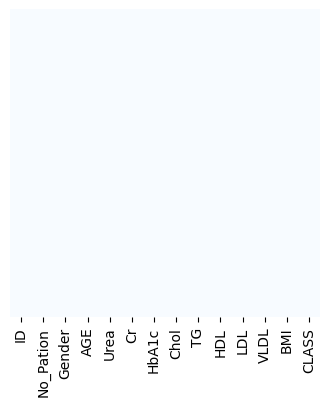

In [13]:
a=df.isnull().astype("int")
plt.figure(figsize=(4,4))
sns.heatmap(a,yticklabels=False,cbar=False,cmap="Blues")
plt.show()

**Observation**
* There is no null values.

In [14]:
data=df.drop(["ID","No_Pation"],axis=1)
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [15]:
data.duplicated().sum()

np.int64(174)

In [16]:
num=df.select_dtypes("number").columns
obj=df.select_dtypes("object").columns

In [17]:
num

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI'],
      dtype='object')

<Figure size 1500x1500 with 0 Axes>

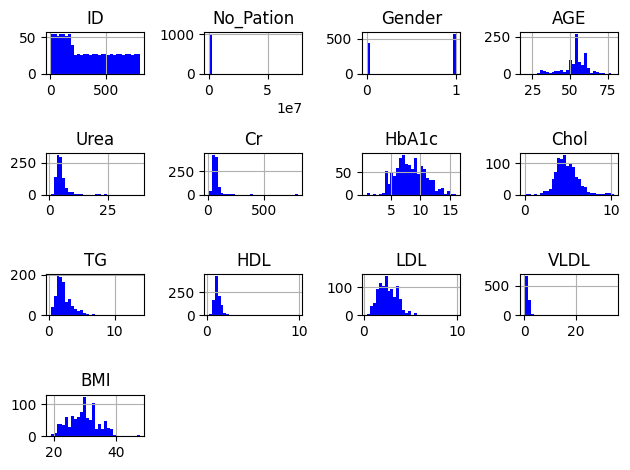

In [18]:
plt.figure(figsize=(15,15))
df[num].hist(bins=30, color="blue")
plt.tight_layout()
plt.show()

**Observation**
* Age of the dataset tennds to be older.
* There are more males than females in the dataset.
* Urea, Cr, TG, HDL, VLDL are right skewed. It means The mean is bigger than the median. Many people have a low level of such an element.
* HbA1c, Chol, LDL, and BMI are all normally distributed.

In [19]:
df.CLASS.unique()

array(['N', 'P', 'Y'], dtype=object)

## Anatomy of attritions

In [20]:
non_diabetic=df.query("CLASS=='N'")
pre_diabetic=df.query("CLASS=='P'")
diabetic=df.query("CLASS=='Y'")

In [21]:
non_diabetic.describe()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,103.000000,1.030000e+02,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,368.252427,8.158520e+05,0.378641,44.233010,4.680583,62.796117,4.560194,4.268932,1.625243,1.227184,2.625243,0.943689,22.374757
std,260.650947,7.426038e+06,0.487420,9.418592,2.517665,30.016453,0.922203,1.278252,1.025338,0.514342,0.981367,1.476328,1.415234
min,7.000000,1.168000e+03,0.000000,25.000000,2.000000,6.000000,0.900000,0.000000,0.600000,0.500000,0.300000,0.200000,19.000000
25%,140.000000,3.424350e+04,0.000000,38.500000,3.300000,45.500000,4.100000,3.650000,1.000000,0.900000,1.900000,0.550000,21.000000
50%,276.000000,3.429400e+04,0.000000,44.000000,4.400000,55.000000,4.900000,4.200000,1.300000,1.100000,2.600000,0.700000,22.000000
75%,645.000000,4.542300e+04,1.000000,50.000000,5.450000,71.500000,5.100000,4.800000,1.800000,1.300000,3.250000,1.000000,24.000000
max,799.000000,7.543566e+07,1.000000,77.000000,22.000000,203.000000,5.600000,9.500000,5.900000,4.000000,4.900000,14.500000,24.600000


In [22]:
pre_diabetic.describe()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,396.056604,64299.037736,0.679245,43.283019,4.511321,66.075472,6.003774,4.579245,2.126415,1.127358,2.493396,0.983019,23.933962
std,261.350812,95677.586440,0.471233,7.761783,2.022438,41.566374,0.188069,1.042991,1.059236,0.383251,0.868633,0.501818,2.713991
min,4.000000,252.000000,0.000000,30.000000,2.100000,37.000000,5.700000,2.000000,0.800000,0.600000,0.800000,0.400000,19.000000
25%,135.000000,26665.000000,0.000000,35.000000,3.400000,53.000000,5.900000,4.000000,1.300000,0.800000,1.900000,0.600000,23.000000
50%,464.000000,45384.000000,1.000000,48.000000,4.400000,59.000000,6.000000,4.700000,1.800000,1.000000,2.500000,0.800000,24.000000
75%,686.000000,87660.000000,1.000000,50.000000,5.000000,64.000000,6.100000,5.300000,2.400000,1.400000,3.200000,1.300000,25.000000
max,754.000000,546543.000000,1.000000,55.000000,17.100000,344.000000,6.400000,6.500000,5.300000,2.500000,3.900000,2.400000,32.000000


In [23]:
diabetic.describe()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,844.000000,8.440000e+02,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,333.624408,2.169559e+05,0.580569,55.305687,5.217468,69.873223,8.878270,4.953104,2.452026,1.206872,2.615213,2.020616,30.811517
std,236.043012,2.613365e+06,0.493759,7.548902,3.022224,63.580116,2.264865,1.298840,1.432638,0.689452,1.144367,3.930617,4.315068
min,1.000000,1.230000e+02,0.000000,20.000000,0.500000,20.000000,2.000000,0.600000,0.300000,0.200000,0.500000,0.100000,19.000000
25%,120.750000,2.404575e+04,0.000000,53.000000,3.700000,48.000000,7.200000,4.100000,1.500000,0.900000,1.800000,0.700000,28.000000
50%,295.500000,3.439550e+04,1.000000,55.000000,4.600000,60.500000,8.800000,4.900000,2.100000,1.100000,2.500000,1.000000,30.000000
75%,537.250000,4.265475e+04,1.000000,60.000000,5.800000,73.000000,10.400000,5.700000,3.000000,1.300000,3.300000,1.500000,33.000000
max,800.000000,6.646788e+07,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [24]:
attrition_mean=data.groupby("CLASS").mean()

In [25]:
attrition_mean.T.style.background_gradient(axis=1)

CLASS,N,P,Y
Gender,0.378641,0.679245,0.580569
AGE,44.233010,43.283019,55.305687
Urea,4.680583,4.511321,5.217468
Cr,62.796117,66.075472,69.873223
HbA1c,4.560194,6.003774,8.878270
Chol,4.268932,4.579245,4.953104
TG,1.625243,2.126415,2.452026
HDL,1.227184,1.127358,1.206872
LDL,2.625243,2.493396,2.615213
VLDL,0.943689,0.983019,2.020616


**Observation**
* Prediabetics have the most males. Non-diabetic are mostly female.
* Diabetics are the most senior people.
* Diabetics have the most chemicals such as Urea, Cr, HbA1c, Chol, TG, VLDL, and BMI.
* Non-dibetics have the lowest chemical elements, and the highest HDL and LDL.

#### Correlatioin Analysis

In [26]:
df["CLASS"]=df.CLASS.map({"N":-1,"P":0,"Y":1})

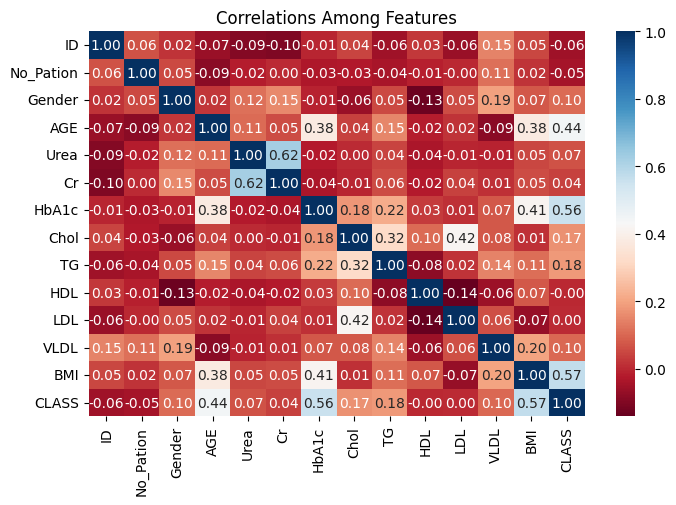

In [27]:
cor=df.corr()
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(cor, annot=True, fmt="0.2f", cmap="RdBu")
plt.title("Correlations Among Features")
plt.show()

**Observation**
* Age is positively correlated with HbA1c, BMI, and CLASS
* Urea is very correlated with Cr.
* HbA1c is positively correlated with TG, BMI, CLASS.
* Chol is positivelt Correlated with TG and LDL.
* BMI is correlated with CLASS. 

**Insights**
* When people is getting old, their weight and HbA1c tend to go up. Part of the aging experience.
* Age, weight, and increase level of HbA1c tend to cause diabetic. 

#### Age Vs Attrition

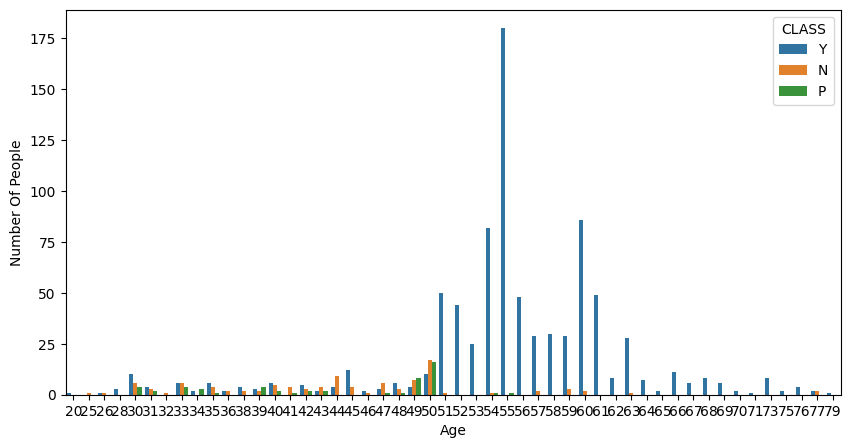

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="AGE",hue="CLASS")
plt.xlabel("Age")
plt.ylabel("Number Of People")
plt.show()

CLASS    N    P     Y  total   N%   P%   Y%
AGE                                        
20     0.0  0.0   1.0    1.0  0.0  0.0  1.0
25     1.0  0.0   0.0    1.0  1.0  0.0  0.0
26     1.0  0.0   1.0    2.0  0.5  0.0  0.5
28     0.0  0.0   3.0    3.0  0.0  0.0  1.0
30     6.0  4.0  10.0   20.0  0.3  0.2  0.5


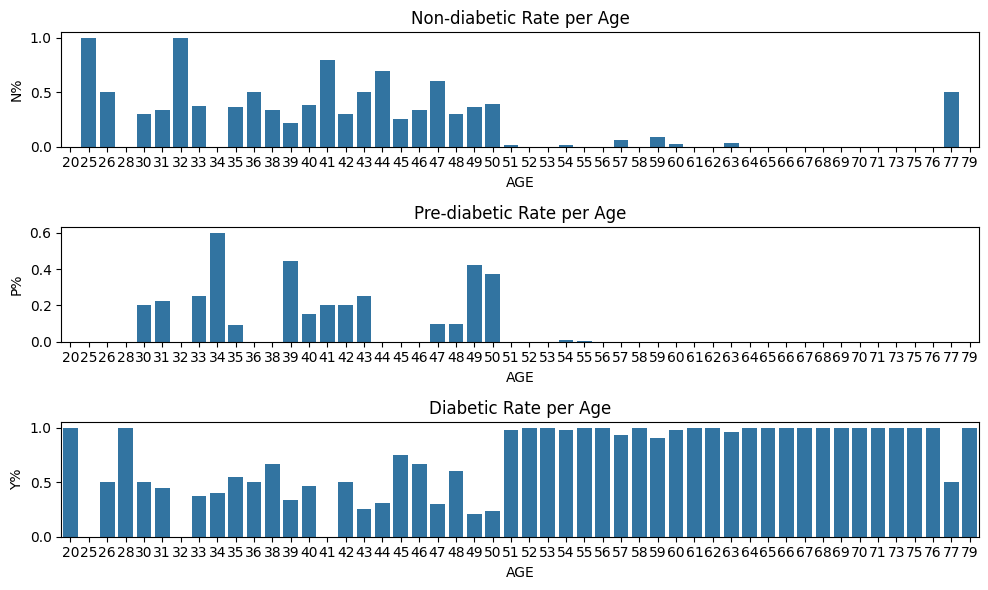

In [29]:
a=data.groupby(["AGE","CLASS"]).size().unstack().fillna(0)
a["total"]=a.sum(axis=1)
a["N%"]=a.N/a.total
a["P%"]=a.P/a.total
a["Y%"]=a.Y/a.total
print(a.head())
a=a.reset_index()
plt.figure(figsize=(10,6))
plt.subplot(311)
sns.barplot(data=a,x="AGE",y="N%")
plt.title("Non-diabetic Rate per Age")
plt.subplot(312)
sns.barplot(data=a,x="AGE",y="P%")
plt.title("Pre-diabetic Rate per Age")
plt.subplot(313)
sns.barplot(data=a,x="AGE",y="Y%")
plt.title("Diabetic Rate per Age")
plt.tight_layout()
plt.show()

**Observation**
* Majority of people who are non-diabetic are young people. After age of 50, it's very rare to have someone who are not non-diabetic.
* Pre-diabetics are not very common, it happens to people after 30.
* For diabetics, it almost have to people at all ages, young people at their 20s started having diabetes as well. However,  

In [30]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [31]:
obj

Index(['CLASS'], dtype='object')

In [32]:
num

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI'],
      dtype='object')

**Gender Vs Class**

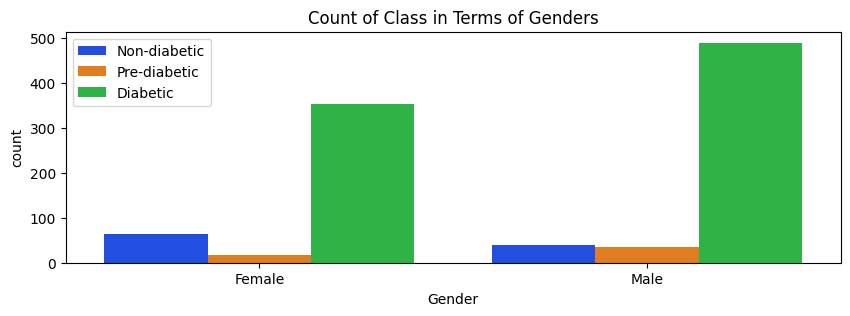

In [87]:
plt.figure(figsize=(10,3))
sns.countplot(data=data,x="Gender", hue="CLASS",palette="bright")
plt.title("Count of Class in Terms of Genders")
plt.xticks([0,1],["Female","Male"])
plt.legend(["Non-diabetic","Pre-diabetic","Diabetic"])
plt.show()

**OBservation**
* Each gender has lots of diabetic patients. However, female has many non-diabetic patients than males.

**Category KDEs**

In [34]:
cols=data.drop(["Gender","CLASS"],axis=1).columns
cols

Index(['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL',
       'BMI'],
      dtype='object')

In [35]:
data.CLASS

0      N
1      N
2      N
3      N
4      N
      ..
995    Y
996    Y
997    Y
998    Y
999    Y
Name: CLASS, Length: 1000, dtype: object

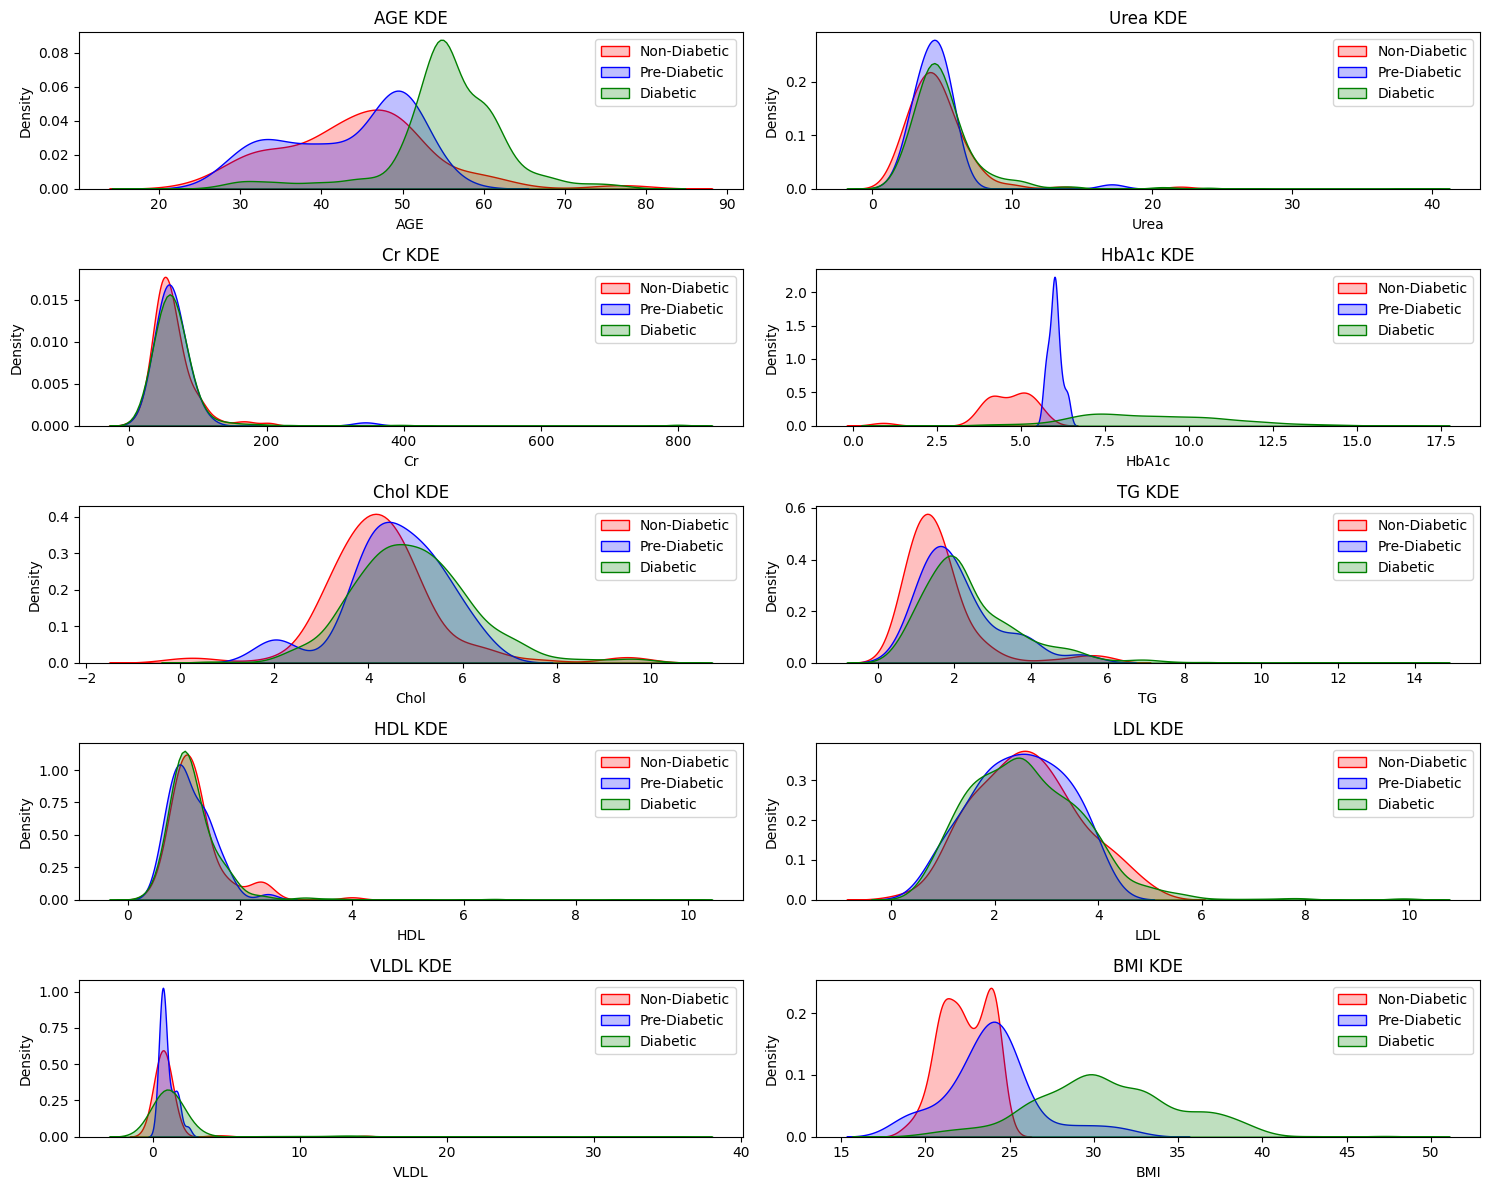

In [36]:
plt.figure(figsize=(15,12))
for num, col in enumerate(cols,1):
    plt.subplot(5,2,num)
    sns.kdeplot(data=df.query("CLASS==-1"), x=col, label="Non-Diabetic", color="r",fill=True)
    sns.kdeplot(data=df.query("CLASS==0"), x=col, label="Pre-Diabetic", color="b",fill=True)
    sns.kdeplot(data=df.query("CLASS==1"), x=col, label="Diabetic", color="g",fill=True)
    plt.title(f"{col} KDE")
    plt.legend()
plt.tight_layout()
plt.show()

**Observation**
* The observation of the kde analysis is very similar to the correlation analysis.
* For age, the diabetics tend to be older.
* For HbA1c, the distribution for each class is very distinctive as the non-diabetics have the lowest level, pre-diabetic have the medium level, and the diabetics dominate the high level of the HbA1c.
* The distribution for BMI is also very similar. Non-diabetics have the lowest BMI, and the pre-diabetics have the medium level, and the diabetics have the highest level of BMI.



**The distribution of BMI, HbA1c in terms of Gender**

In [37]:
a=data.copy()
a["Gender"]=a["Gender"].map({0:"Female",1:"Male"})
a

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,Male,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,Male,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,Male,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,Male,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


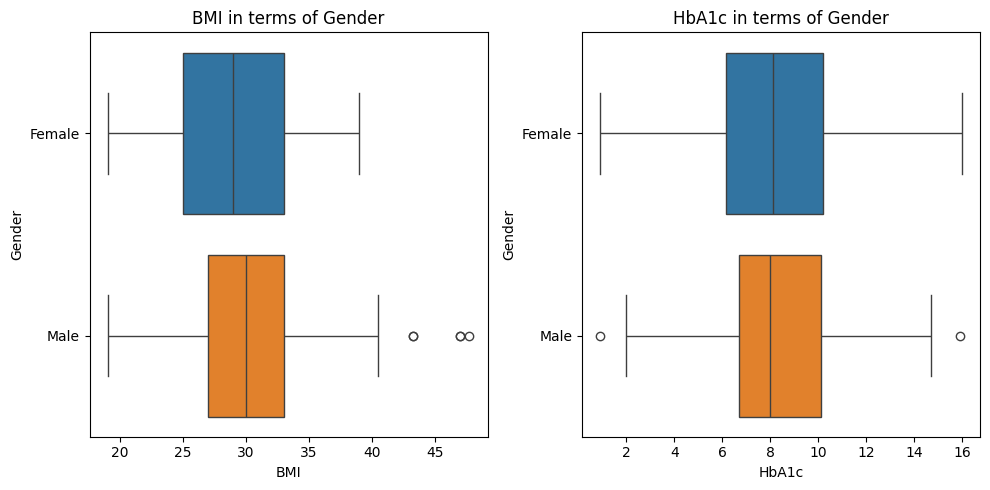

In [38]:
plt.figure(figsize=(10,5))
for num, col in enumerate(["BMI","HbA1c"],1):
    plt.subplot(1,2,num)
    sns.boxplot(data=a, x=col, y="Gender",hue="Gender")
    plt.title(f"{col} in terms of Gender")
plt.tight_layout()    
plt.show()

**Observation**
* Women has a lower BMI than the male counterpart.
* Male has a lower HbA1c than the female counter part.

#### Part 2.1 Machine Learning Model - Logistic Regression

In [39]:
X=data.drop("CLASS",axis=1)
#y=data.CLASS.map({"N":-1,"P":0,"Y":1})
y=data.CLASS

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
log=LogisticRegression(max_iter=50000,solver="saga", class_weight="balanced")
log_multi=OneVsRestClassifier(log)
params={
    "estimator__C":np.logspace(0,4,10),
    "estimator__penalty":["l1","l2"]
}

grid=GridSearchCV(log_multi,params)
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                                        max_iter=50000,
                                                                        solver='saga')),
             param_grid={'estimator__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'estimator__penalty': ['l1', 'l2']})

In [42]:
best_params=grid.best_params_
print(best_params)

{'estimator__C': np.float64(1.0), 'estimator__penalty': 'l1'}


In [43]:
log_multi1=OneVsRestClassifier(LogisticRegression(max_iter=50000,solver="saga", C=1, penalty="l1"))
log_multi1.fit(X_train_scaled,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1, max_iter=50000,
                                                 penalty='l1', solver='saga'))

In [44]:
training_accuracy=log_multi1.score(X_train_scaled,y_train)
testing_accuracy=log_multi1.score(X_test_scaled,y_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
print(f"The training accuracy is {training_accuracy}. The testing accuracy is {testing_accuracy}")
y_pred=log_multi1.predict(X_test_scaled)
cm=confusion_matrix(y_test, y_pred)
print(cm)

The training accuracy is 0.915. The testing accuracy is 0.945
[[ 19   0   2]
 [  2   2   2]
 [  4   1 168]]


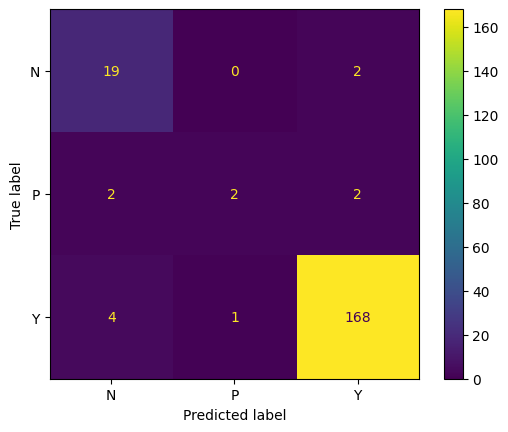

In [45]:
disp=ConfusionMatrixDisplay(cm, display_labels=log_multi1.classes_)
disp.plot()
plt.show()

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.76      0.90      0.83        21
           P       0.67      0.33      0.44         6
           Y       0.98      0.97      0.97       173

    accuracy                           0.94       200
   macro avg       0.80      0.74      0.75       200
weighted avg       0.94      0.94      0.94       200



In [47]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) curve')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

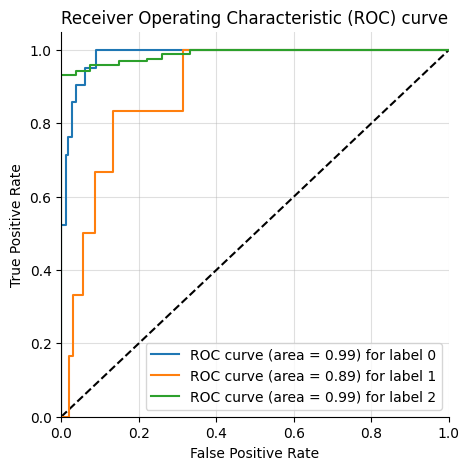

In [48]:
plot_multiclass_roc(log_multi1, X_test_scaled, y_test, n_classes=3, figsize=(5,5))

**Observation**
* The model is highly accurate as both the training and testing accuracies are above 90%. 
* The model is better at predicting diabetic cases over the non-diabetic cases and pre-diabetic cases.
* The AUC for the predictions for all the cases are very high and all above 50%. It means it has high accuracy of predictings.

#### Part 2.2 Machine Learning Model - SVM

In [49]:
X=data.drop("CLASS",axis=1)
y=df.CLASS

In [50]:
X=data.drop("CLASS",axis=1)
y=df.CLASS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm=SVC(class_weight="balanced")
params={"C": [0.001,0.01, 0.1, 0.5, 1],
       "kernel": ["linear","rbf", "poly"],
       "gamma":["scale","auto"],
       }

grid=GridSearchCV(svm, params)
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [52]:
best_params=grid.best_params_

In [53]:
best_params

{'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}

In [54]:
svm=SVC(**best_params)
svm.fit(X_train_scaled,y_train)

SVC(C=0.5, kernel='linear')

In [55]:
training_accuracy=svm.score(X_train_scaled,y_train)
testing_accuracy=svm.score(X_test_scaled,y_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
print(f"The training accuracy is {training_accuracy}. The testing accuracy is {testing_accuracy}")
y_pred=svm.predict(X_test_scaled)
cm=confusion_matrix(y_test, y_pred)
print(cm)

The training accuracy is 0.93875. The testing accuracy is 0.935
[[ 18   0   3]
 [  2   2   2]
 [  6   0 167]]


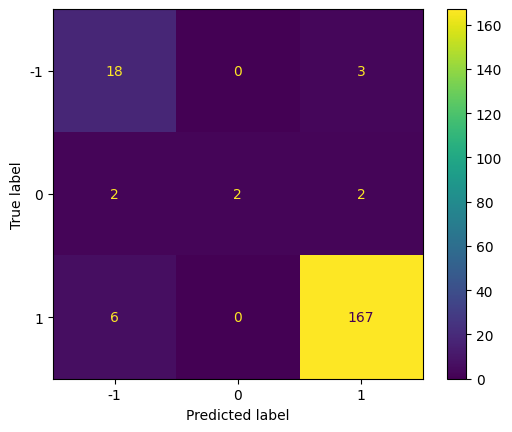

In [56]:
disp=ConfusionMatrixDisplay(cm, display_labels=svm.classes_)
disp.plot()
plt.show()

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.69      0.86      0.77        21
           0       1.00      0.33      0.50         6
           1       0.97      0.97      0.97       173

    accuracy                           0.94       200
   macro avg       0.89      0.72      0.74       200
weighted avg       0.94      0.94      0.93       200



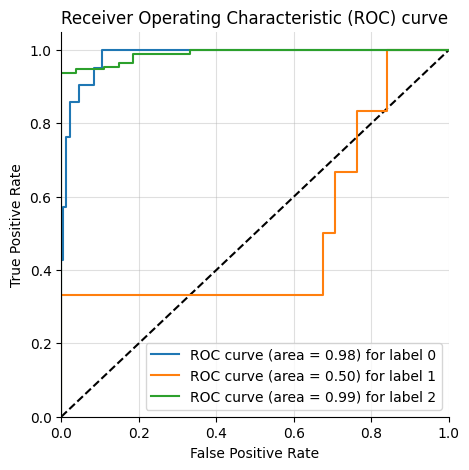

In [58]:
plot_multiclass_roc(svm, X_test_scaled, y_test, n_classes=3, figsize=(5,5))

**Observation**
* The accuracy of this model is much higher than logistic regression. And it's very good at predicting non-diabetic cases and diabetic cases, but it's bad at predicting pre-diabetics.

#### Part 2.3: Machine Learning Model - Decision Trees

In [59]:
y=data.CLASS
X=data.drop("CLASS", axis=1)

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree=DecisionTreeClassifier(class_weight="balanced")
params={
    "max_depth":[5,10,15,20],
    "min_samples_leaf":np.arange(2,21,1),
    "criterion":["entropy","gini"]
}
grid_tree=GridSearchCV(tree,params)
grid_tree.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])})

In [62]:
best_params=grid_tree.best_params_
best_params

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': np.int64(2)}

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(**best_params,class_weight="balanced")
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=np.int64(2))

In [64]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
print(f"The training accuracy is {accuracy_score(y_train,y_train_pred)}")
print(f"The testing accuracy is {accuracy_score(y_test,y_test_pred)}")

The training accuracy is 0.99625
The testing accuracy is 0.99


#### Important Features

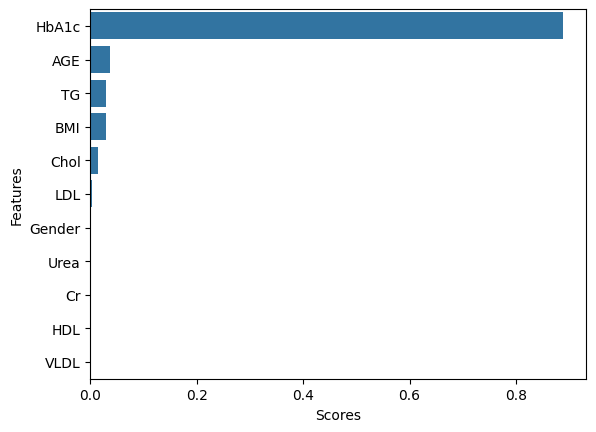

In [66]:
df_importance=pd.DataFrame({"Features":X.columns,"Scores":dt.feature_importances_})
sns.barplot(df_importance.sort_values("Scores", ascending=False), x="Scores",y="Features")
plt.show()

**Observation**
* The most important feature to the siabetes is HbA1c.

In [67]:
from sklearn.metrics import accuracy_score
print(f"The training accuracy is {accuracy_score(y_train,y_train_pred)}")
print(f"The testing accuracy is {accuracy_score(y_test,y_test_pred)}")


The training accuracy is 0.99625
The testing accuracy is 0.99


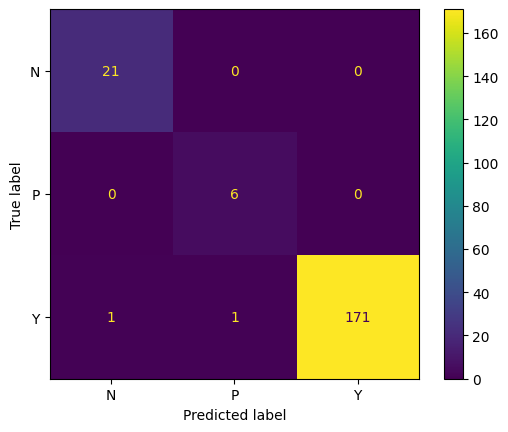

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(cm, display_labels=dt.classes_)
disp.plot()
plt.show()

In [69]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           N       0.95      1.00      0.98        21
           P       0.86      1.00      0.92         6
           Y       1.00      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.94      1.00      0.96       200
weighted avg       0.99      0.99      0.99       200



**Observation**
* Not only decision trees have the accuracy as other two models, but also it has high precision and recall for each class. It's able to predict each class with sacrificing the accuracy of other classes.

#### Part 3: K Means Clustering

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X=data.drop("CLASS",axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
scores=[]
inertias=[]
for num in range(2,20):
    kmeans=KMeans(n_clusters=num,random_state=42)
    kmeans.fit(X_scaled)
    score=silhouette_score(X_scaled,kmeans.labels_)
    scores.append(score)
    inertias.append(kmeans.inertia_)

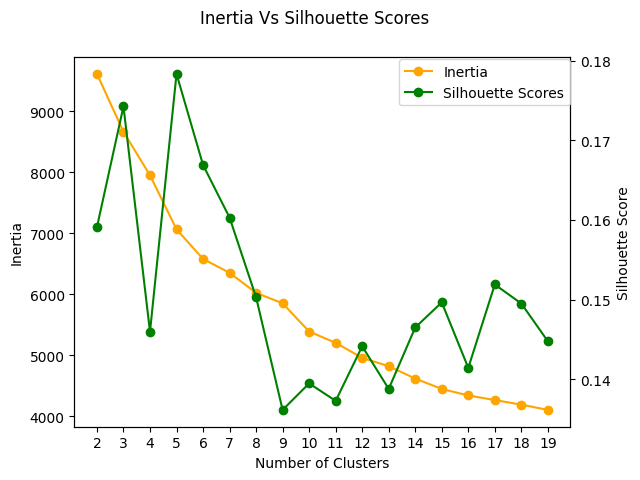

In [71]:
fig,ax=plt.subplots()
ax.plot(
    range(2,20),
    inertias,
    label="Inertia",
    c="orange",
    marker="o"
)
ax.set_ylabel("Inertia")
ax.set_xlabel("Number of Clusters")

ax2=ax.twinx()
ax2.plot(
    range(2,20),
    scores,
    label="Silhouette Scores",
    c="green",
    marker="o"
)
ax2.set_ylabel("Silhouette Score")
plt.xticks(range(2,20))
fig.suptitle("Inertia Vs Silhouette Scores")
fig.legend(bbox_to_anchor=(0.91,0.89))

#### Set n_cluster=5 since the silhouette score is the highest when n_cluster=5

In [72]:
kmeans5=KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans5.fit(X_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

Text(0.5, 1.0, '8 Clusters Heatmap')

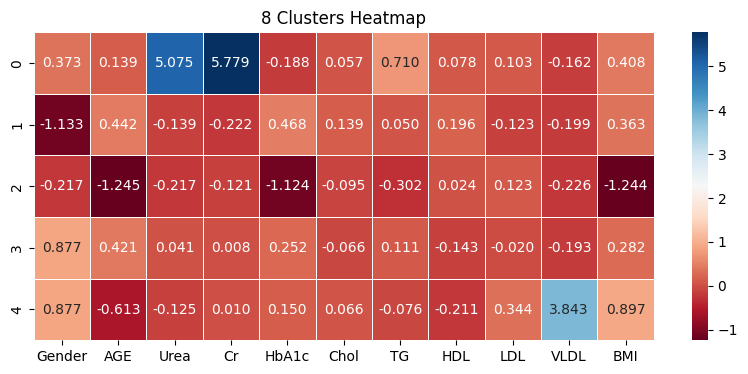

In [73]:
cluster_centers8=pd.DataFrame(kmeans5.cluster_centers_,columns=X.columns)
plt.figure(figsize=(10,4))
sns.heatmap(cluster_centers8, annot=True, cmap="RdBu", fmt="0.3f", linewidth=0.5)
plt.title("8 Clusters Heatmap")

**Label Each Cluster**
* Cluster 0: High in Urea and Cr.
* Cluster 1: High in seniors and HbA1c. 
* Cluster 2: High in seniors and HbA1c BMI.
* Cluster 3: High in Age and HbA1c.
* Cluster 4: High in youth, VLDL, nd BMI.

In [74]:
df["5_clusters"]=kmeans5.labels_

In [75]:
df["5_clusters_label"]=df["5_clusters"].map({
    0: "0. High in Urea and Cr.",
    1: "1. High in seniors and HbA1c.",
    2: "2. High in youngth, HbA1c, and BMI.",
    3: "3. High in Age and HbA1c.",
    4: "4. High in youth, VLDL, and BMI."
})


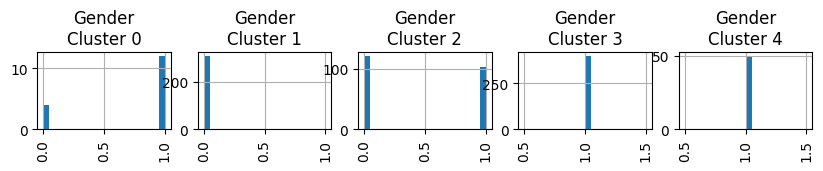

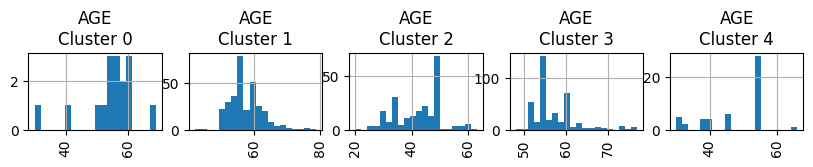

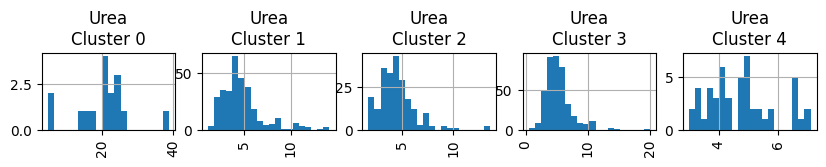

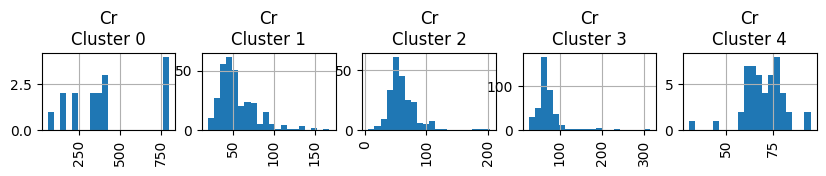

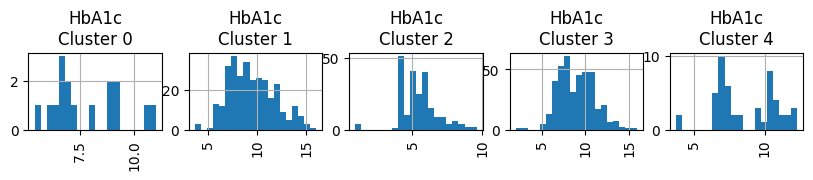

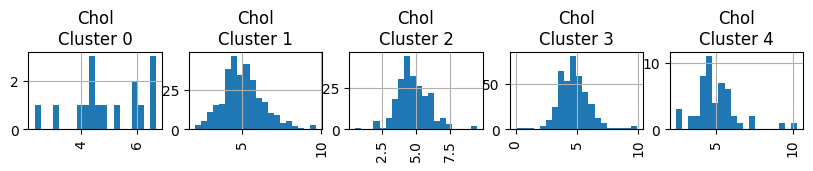

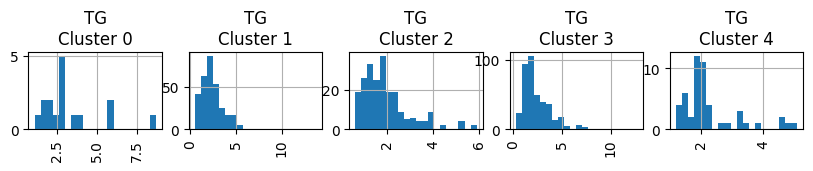

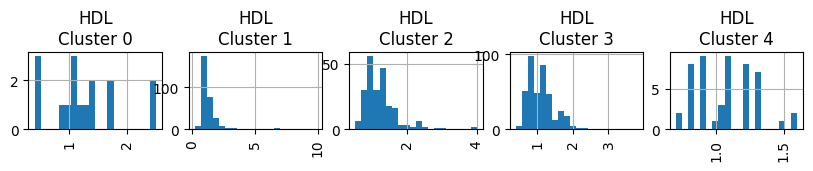

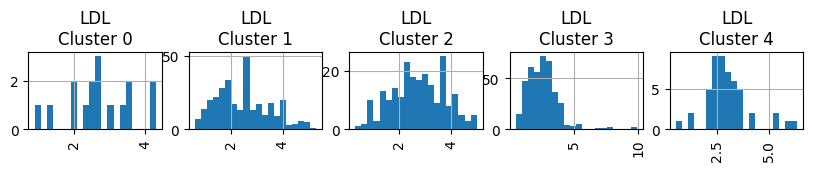

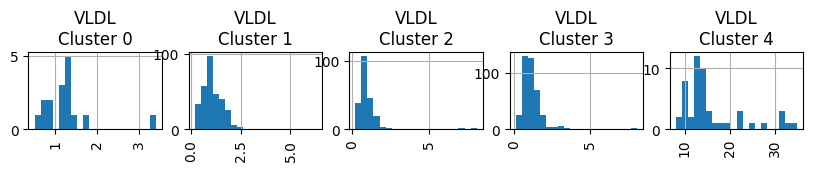

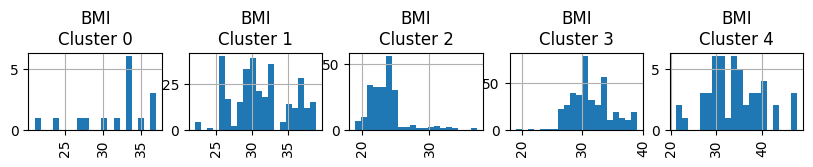

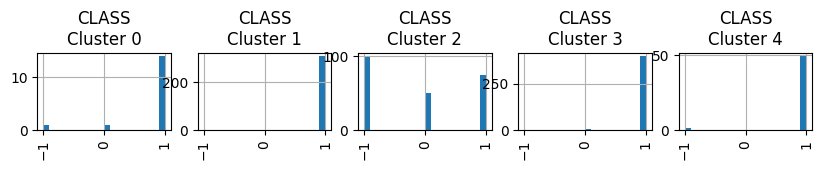

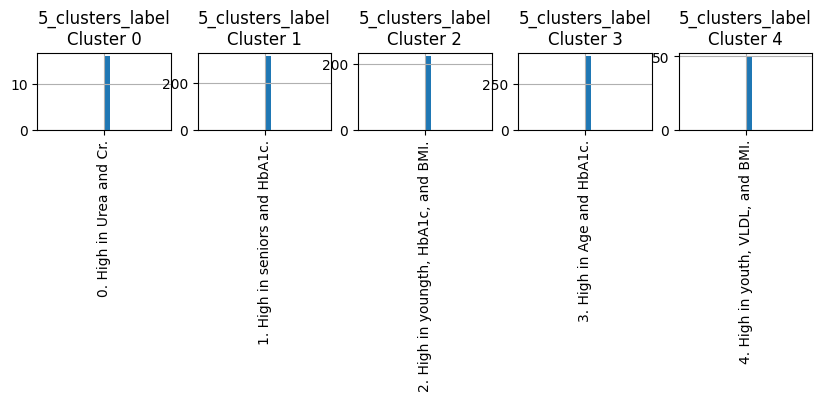

In [76]:
for col in df.drop(["ID","No_Pation","5_clusters"],axis=1).columns:
    plt.figure(figsize=(10,1))
    for i in range(0,5):
        plt.subplot(1,5,i+1)
        cluster=df[df["5_clusters"]==i]
        cluster[col].hist(bins=20)
        plt.xticks(rotation=90)
        plt.title(f"{col}\nCluster {i}")
plt.show()     

#### PCA Visualization

In [77]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [78]:
a=pca.explained_variance_ratio_
print(f"The total variance of the first two components are {np.round(sum(a),4)}")

The total variance of the first two components are 0.3354


In [79]:
components=pca.components_
components

array([[ 0.14255926,  0.43369017,  0.21292173,  0.20950948,  0.4769989 ,
         0.27687873,  0.36388779, -0.02448929,  0.1309304 ,  0.19577018,
         0.4579162 ],
       [ 0.27202951, -0.08219205,  0.61574975,  0.62649738, -0.26276003,
        -0.19101451, -0.0870806 , -0.1404045 , -0.03350681, -0.00620701,
        -0.11666461]])

In [80]:
df_components=pd.DataFrame(
    components, index=["Comp_1","Comp_2"],
    columns=X.columns
)
df_components.style.background_gradient()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
Comp_1,0.142559,0.433690,0.212922,0.209509,0.476999,0.276879,0.363888,-0.024489,0.130930,0.195770,0.457916
Comp_2,0.272030,-0.082192,0.615750,0.626497,-0.262760,-0.191015,-0.087081,-0.140404,-0.033507,-0.006207,-0.116665


**Interpretation of Components**
* Component 1: High: Age, HbA1c, Chol, TG, BMI
* Component 2: High: Urea, Cr; Low: Chol, HDL, 

In [81]:
pca_df=pd.DataFrame(pca.transform(X_scaled),columns=["Component1","Component2"])


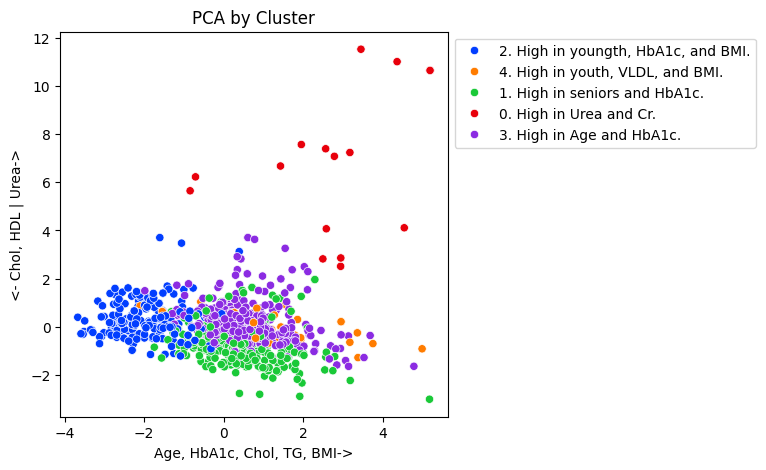

In [82]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=pca_df, x="Component1",y="Component2",hue=df["5_clusters_label"],palette="bright")
plt.xlabel("Age, HbA1c, Chol, TG, BMI->")
plt.ylabel("<- Chol, HDL | Urea->")
plt.title("PCA by Cluster")
plt.legend(bbox_to_anchor=(1,1))

#### Cluster EDA

In [83]:
df["5_clusters_label"].value_counts()

5_clusters_label
3. High in Age and HbA1c.              400
1. High in seniors and HbA1c.          311
2. High in youngth, HbA1c, and BMI.    223
4. High in youth, VLDL, and BMI.        50
0. High in Urea and Cr.                 16
Name: count, dtype: int64

In [84]:
a=df.groupby(["5_clusters_label", "CLASS"]).size().unstack().fillna(0)
a.columns=["Non-diabetics", "Pre-diabetics", "Disbetics"]
a

,Non-diabetics,Pre-diabetics,Disbetics
5_clusters_label,,,
0. High in Urea and Cr.,1.0,1.0,14.0
1. High in seniors and HbA1c.,1.0,0.0,310.0
"2. High in youngth, HbA1c, and BMI.",99.0,50.0,74.0
3. High in Age and HbA1c.,1.0,2.0,397.0
"4. High in youth, VLDL, and BMI.",1.0,0.0,49.0


In [85]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS', '5_clusters', '5_clusters_label'],
      dtype='object')

In [86]:
b=df.groupby("5_clusters_label").agg({"AGE":"mean","HbA1c":"mean","BMI":"mean"})
c=pd.concat([a,b],axis=1)
c

,Non-diabetics,Pre-diabetics,Disbetics,AGE,HbA1c,BMI
5_clusters_label,,,,,,
0. High in Urea and Cr.,1.0,1.0,14.0,54.750000,7.806250,31.600000
1. High in seniors and HbA1c.,1.0,0.0,310.0,57.418006,9.465466,31.379614
"2. High in youngth, HbA1c, and BMI.",99.0,50.0,74.0,42.578475,5.434081,23.410314
3. High in Age and HbA1c.,1.0,2.0,397.0,57.232500,8.919000,30.979000
"4. High in youth, VLDL, and BMI.",1.0,0.0,49.0,48.140000,8.662000,34.025200


#### Conclusions & Recommendations

**Conclusions and Insights**
* Diabetics are assocated with over weights, high blood sugar and aging. So to stay healthy, patients need to watch out their sugar intakes and weights. 
* Healthy diets and frequent exercises shhould be in order.
* For elders, they should have their HbA1c measured frequently to be able to detect diabete in early stage.

**Recommendations**
* Diabetics are in each group. For cluster 0, 1, and 3, there are lots of overweighted seniors. They also have a high HbA1c. SO they need to be the priority for the treatment. They need to exercise and lower their HbA1c by reducing sugar in their diet.
* For cluster 4. They are younger than cluster 0, 1, and 3; however, they are overweight and have a high HbA1c. They need to exercise and reduce blood sugar level in their systems.
* For cluster 2, They are the most healthy bunch, they have low blood sugar level and the lowest weight. Keep up the good work . Exercise and keep low blood sugar level.

**The End**
<br>
**Thanks for Reading**